In [1]:
import os
os.chdir(path='../')
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import STForte.helper as stfhelper
from STForte.helper import mclust_R
sc.set_figure_params(dpi=120, transparent=True, dpi_save=400, frameon=False, vector_friendly=False, format="pdf", fontsize=16)
trial_name = "trial-mouse_olfa_Visium"
plot_dir = f"./{trial_name}/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
sc.settings.figdir = plot_dir
plt.rcParams['font.sans-serif'] = [
    'Helvetica',
    'Arial',
    'sans-serif',]
palette = px.colors.qualitative.Plotly
palette_1 = stfhelper.pl.rgb2hex(px.colors.qualitative.Bold)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/pytorch_lightning/utilities/seed.py:47: LightningDeprecationWarning: `pytorch_lightning.utilities.seed.seed_everything` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.seed.seed_everything` instead.
  rank_zero_deprecation(
Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata
crop = [19200, 22200, 12000, 15000]

In [3]:
adata_sp = sc.read_h5ad(f"./{trial_name}/outputs/sp.h5ad")
adata_sp

AnnData object with n_obs × n_vars = 3535 × 300
    obs: 'spot_instance'
    obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'spatial'
    obsp: 'A_STForte_conn', 'A_STForte_recon'

In [4]:
n_clusters = 6
adata = mclust_R(adata, n_clusters, "mclust_STForte_COMB", used_obsm="STForte_COMB")

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [5]:
sc.pp.neighbors(adata, use_rep="STForte_COMB")
sc.tl.umap(adata)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


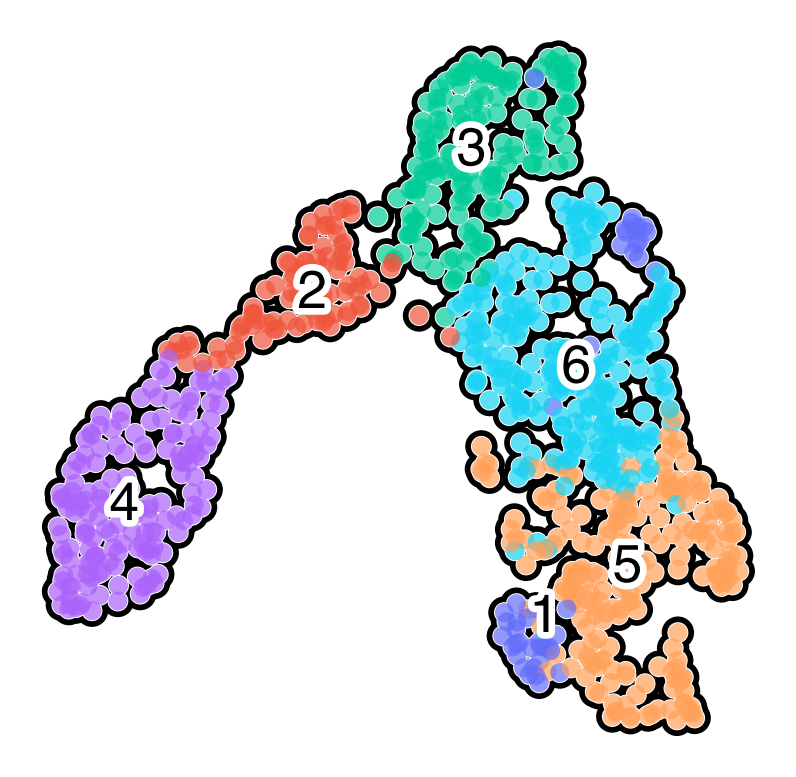

In [6]:
sc.pl.umap(adata, color="mclust_STForte_COMB", title="",
           legend_loc="on data", legend_fontoutline=4, add_outline=True, palette=palette, frameon=False,)

In [7]:
sc.pl.spatial(adata, color=["mclust_STForte_COMB"], img_key="hires", bw=True, title=['STForte'], size=1.25, frameon=False,
                  legend_fontoutline=4, show=False,)

[<Axes: title={'center': 'STForte'}, xlabel='spatial1', ylabel='spatial2'>]

In [8]:
sc.pl.spatial(adata, color=["mclust_STForte_COMB"], crop_coord=crop, img_key="hires", size=0.85, frameon=False,)

In [9]:
# UMAP for padding data
sc.pp.neighbors(adata_sp, use_rep="SP_TOPO")
sc.tl.umap(adata_sp)
# Propagate annotations
stfhelper.annotation_propagate(adata_sp, "mclust_STForte_COMB", adata, latent_embed="SP_TOPO")

Abbreviations of different layers:
- granule cell layer (GCL)
- internal plexiform layer (IPL)
- mitral cell layer (MCL)
- external plexiform layer (EPL)
- glomerular layer (GL)
- olfactory nerve layer (ONL)

In [10]:
cat_name = {
    1: "ONL",
    6: "GL",
    2: "MCL",
    4: "GCL",
    3: "EPL",
    5: "ONL",
}
adata.obs["mclust_refined"] = adata.obs["mclust_STForte_COMB"].map(cat_name).astype('category')
adata.obs["mclust_refined"] = adata.obs["mclust_refined"].cat.reorder_categories(['ONL', 'GL', 'EPL', 'MCL', 'GCL'])
adata.obs["mclust_refined"]
adata_sp.obs["mclust_refined_with_padding"] = adata_sp.obs["mclust_STForte_COMB_with_padding"].map(cat_name).astype('category')
adata_sp.obs["mclust_refined_with_padding"] = adata_sp.obs["mclust_refined_with_padding"].cat.reorder_categories(['ONL', 'GL', 'EPL', 'MCL', 'GCL'])

In [11]:
sc.pl.umap(adata, color="mclust_refined", title="",
           legend_loc="on data", legend_fontoutline=4, add_outline=True, palette=palette_1, frameon=False,
           save="_mclust_comb_refined",
        )

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [12]:
sc.pl.spatial(adata, color=["mclust_refined"], img_key="hires", bw=True, title="", size=1.25, frameon=False,
                  legend_fontoutline=4, legend_loc=None, 
                  save="_mclust_comb_refined",)

In [13]:
with plt.rc_context():
    ax = sc.pl.spatial(adata, color=["mclust_refined"],
                title="",
                crop_coord=crop,
                frameon=True, legend_loc=None,
                img_key="hires", size=0.85, alpha=0.75,
                show=False,)[0]
    _ = ax.set_xlabel("")
    _ = ax.set_ylabel("")
    plt.savefig(f"{plot_dir}/show_zoomin_mclust_comb_refined.pdf", bbox_inches="tight", dpi=400)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


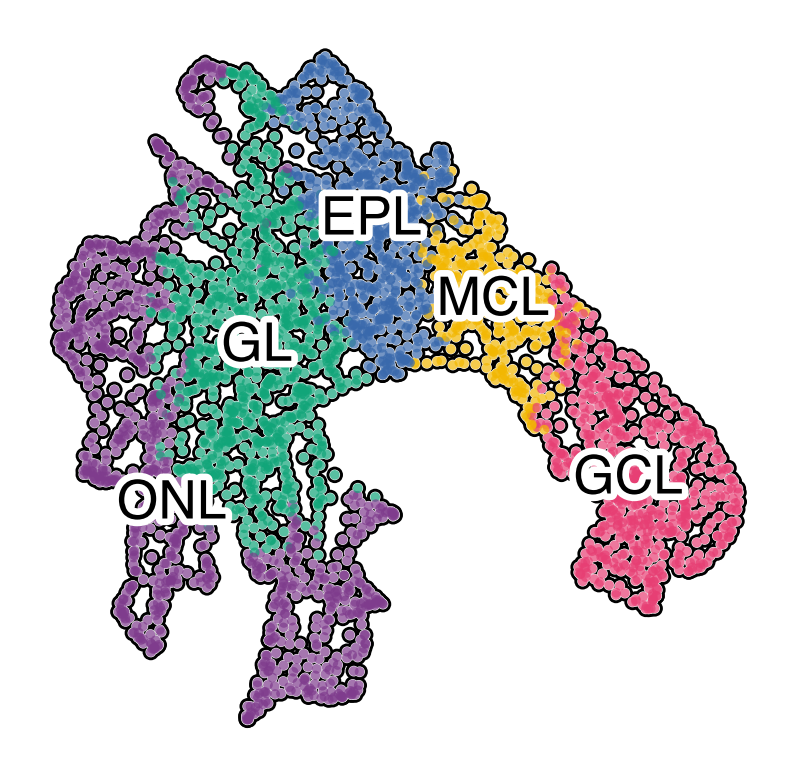

In [14]:
sc.pl.umap(adata_sp, color=["mclust_refined_with_padding"], title="", legend_loc="on data", legend_fontoutline=4, add_outline=True, 
               palette=palette_1, frameon=False,
               save="_sp_refined_pad_by_comb",)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


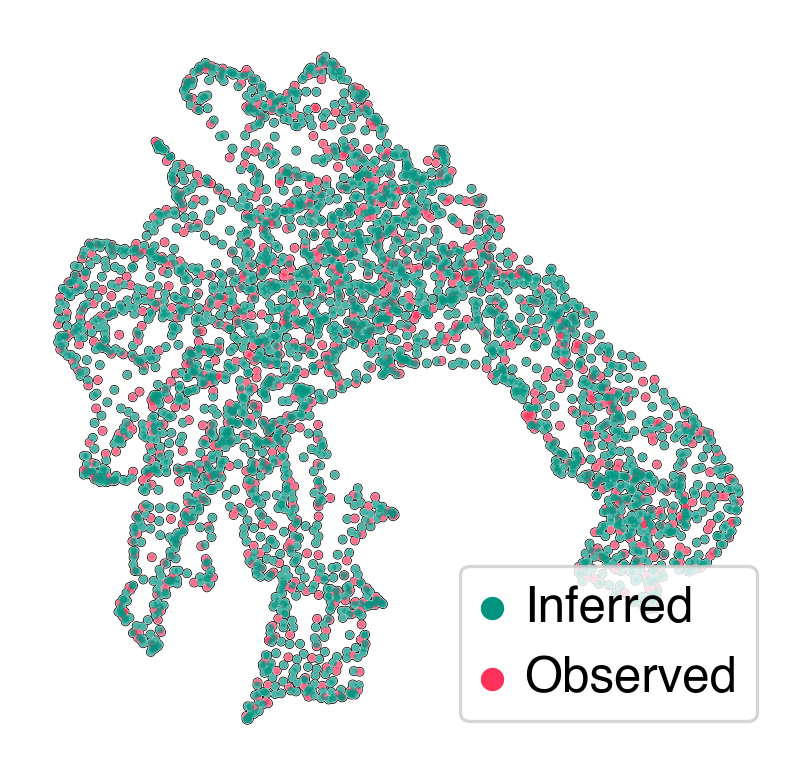

In [15]:
fig = sc.pl.umap(adata_sp, color="spot_instance", add_outline=True, outline_width=[0.1, 0.05], 
                     palette=stfhelper.pl.iwanthue_alphabet_hard[:2], size=20, title="",
                     frameon=False, show=False, return_fig=True,)
ax = fig.axes[0]
# ax.legend_.set_title('Spot Instance')
ax.legend_.set_frame_on(True)
ax.legend_.set_bbox_to_anchor((0.55,0.15))
fig.savefig(f"{plot_dir}/umap_sp_spot_instance.pdf", bbox_inches="tight", dpi=400)

In [16]:
sc.pl.spatial(adata_sp, color=['mclust_refined_with_padding'], size=0.625, bw=True,
                  frameon=False,
                  img=adata.uns['spatial']['stomic']['images']['hires'], title="",
                  spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                  scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                  legend_fontoutline=4, legend_loc=None, 
                  save="_sp_refined_pad_by_comb",)

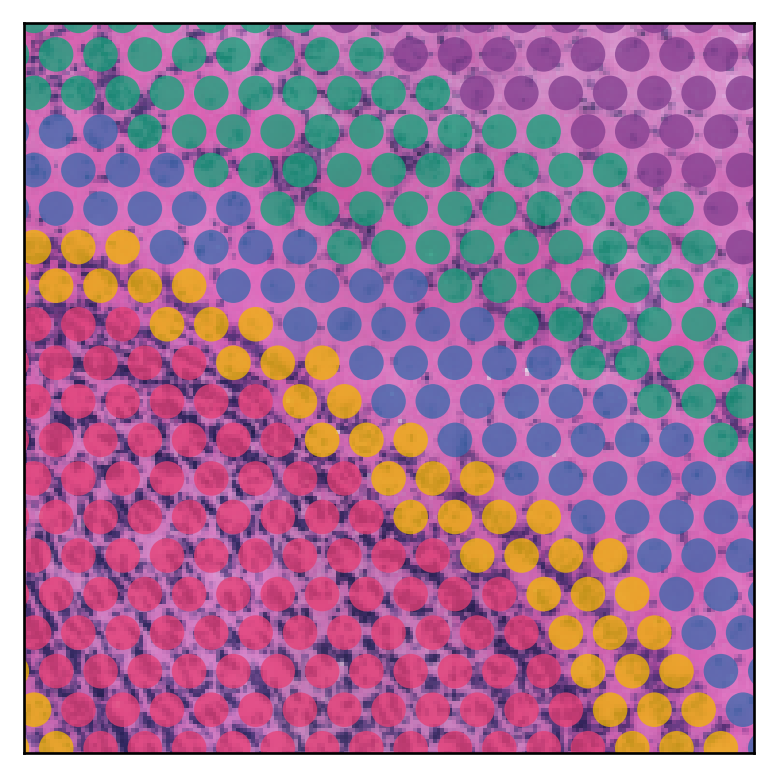

In [17]:
with plt.rc_context():
    ax = sc.pl.spatial(adata_sp, color=['mclust_refined_with_padding'],
                       alpha=0.75, size=0.6,
                       crop_coord=crop,
                       img=adata.uns['spatial']['stomic']['images']['hires'], frameon=True, title='',
                       spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                       scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'], 
                       legend_fontoutline=4, legend_loc=None,
                       show=False,)[0]
    _ = ax.set_xlabel("")
    _ = ax.set_ylabel("")
    plt.savefig(f"{plot_dir}/show_sp_zoomin_mclust_comb_refined.pdf", bbox_inches="tight", dpi=400)

In [18]:
adata.write_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata_sp.write(f"./{trial_name}/outputs/sp.h5ad")

In [19]:
sc.pl.spatial(adata_sp,
                frameon=False,
                img=adata.uns['spatial']['stomic']['images']['hires'], title=[''],
                spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                save="_slide_only",)

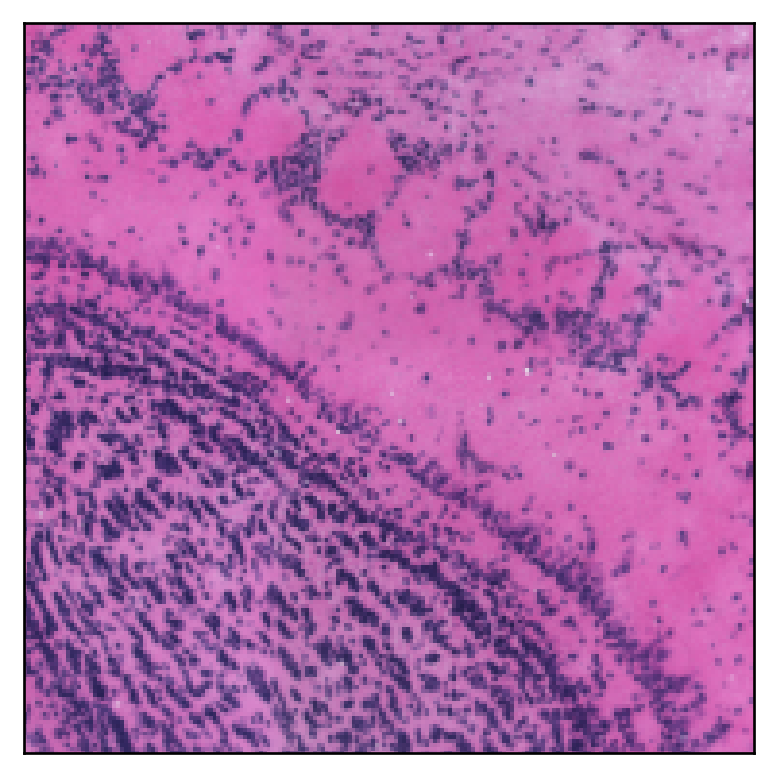

In [20]:
with plt.rc_context():
    ax = sc.pl.spatial(adata_sp,
                       frameon=True, crop_coord=crop,
                       img=adata.uns['spatial']['stomic']['images']['hires'], title=[''],
                       spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                       scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                       show=False,)[0]
    _ = ax.set_xlabel("")
    _ = ax.set_ylabel("")
    plt.savefig(f"{plot_dir}/show_zoomin_slide_only.pdf", bbox_inches="tight", dpi=400)

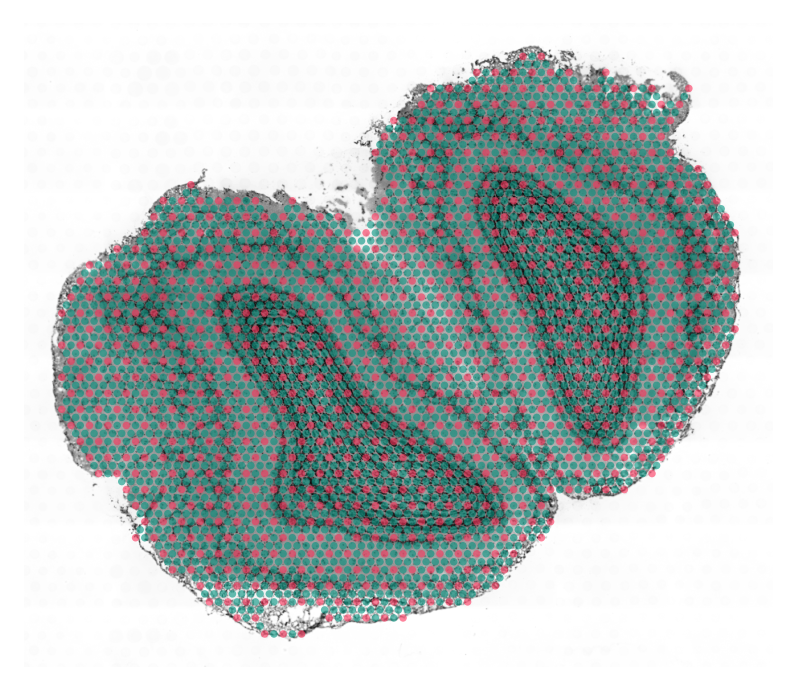

In [21]:
sc.pl.spatial(adata_sp, size=0.625, alpha=0.6, bw=True,
                color="spot_instance",
                frameon=False,
                img=adata.uns['spatial']['stomic']['images']['hires'], title=[''],
                spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                legend_loc=None,
                save="_spot_instance",)

In [22]:
with plt.rc_context():
    ax = sc.pl.spatial(adata_sp, size=0.625, alpha=0.6, bw=True,
                       color="spot_instance",
                       frameon=True, crop_coord=crop,
                       img=adata.uns['spatial']['stomic']['images']['hires'], title=[''],
                       spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                       scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                       legend_loc=None,
                       show=False,)[0]
    _ = ax.set_xlabel("")
    _ = ax.set_ylabel("")
    plt.savefig(f"{plot_dir}/show_zoomin_spot_instance.pdf", bbox_inches="tight", dpi=400)

In [23]:
sc.pl.spatial(adata, color=["STForte_Mask"], img_key="hires", bw=True, size=1.25, frameon=False,
                title="Mask(Original)",
                palette=stfhelper.pl.iwanthue_answer_hard[:2],
                legend_fontoutline=4, legend_loc=None, 
                save="_original_mask",)